<a href="https://colab.research.google.com/github/Victor1e/Project_Rumelhart_Romanian/blob/main/AIM_Project_Rumelhart_Verbs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Avansat Pregatit: 1560 exemple.
Exemple generate: [('face', 'facut'), ('rupe', 'rupt'), ('logeloa', 'logeloat'), ('spune', 'spus'), ('avea', 'avut')]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ ?                      │   0 (unbuilt) │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


🚀 Incepem antrenarea retelei avansate...
Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 171ms/step - accuracy: 0.5319 - loss: 2.3431 - val_accuracy: 0.6624 - val_loss: 1.1505
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.6704 - loss: 1.0528 - val_accuracy: 0.6927 - val_loss: 1.0075
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.7095 - loss: 0.9475 - val_accuracy: 0.7073 - val_loss: 0.9568
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 0.7130 - loss: 0.9277 - val_accuracy: 0.7187 - val_loss: 0.9265
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.7257 - loss: 0.8885 - val_accuracy: 0.7267 - val_loss: 0.9014
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - accuracy: 0.7351 - loss: 0.8531 - val_accuracy: 0.7281 - val_loss: 0.8691
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.7437 - loss: 0.8235 - val_accuracy: 0.7400 - val_loss: 0.8167
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step -

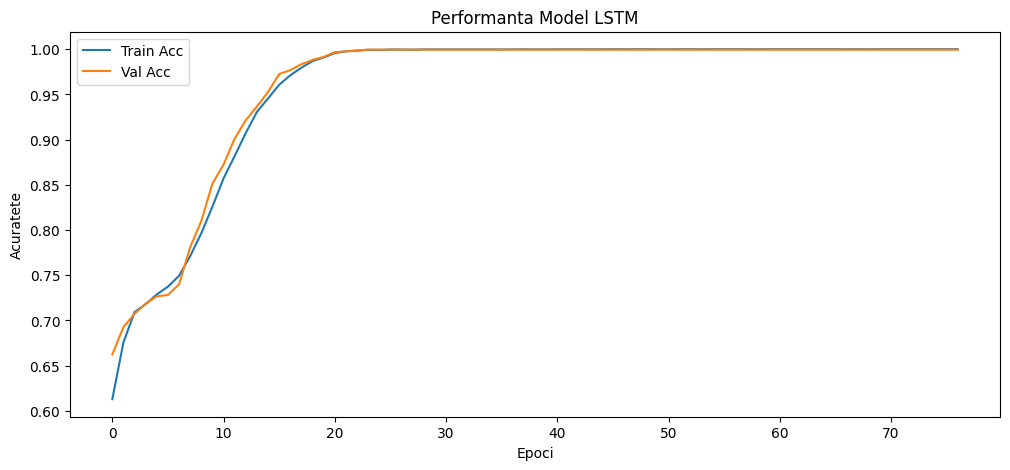


--- 🏆 TESTE FINALE ---
Infinitiv: manca        -> Prezicere: mancat
Infinitiv: fi           -> Prezicere: fost
Infinitiv: scrie        -> Prezicere: scris
Infinitiv: boganiza     -> Prezicere: boganizat
Infinitiv: programiza   -> Prezicere: programizat
Infinitiv: cauta        -> Prezicere: cautat
Infinitiv: vedea        -> Prezicere: vazut

Nota: Daca 'boganiza' -> 'boganizat', modelul a invatat REGULA, nu doar memoria!


In [3]:
# ==============================================================================
# PROIECT: Rumelhart & McClelland 86 - ADVANCED IMPLEMENTATION (LSTM & Data Gen)
# AUTORI: Victor Albu, Ciprian Cristescu
# DESCRIERE: Model Sequence-to-Sequence la nivel de caracter pentru conjugare
# ==============================================================================

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional, TimeDistributed, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import random

# ==========================================
# 1. GENERATOR DE DATE SINTETICE (Data Augmentation)
# ==========================================
# Pentru a lua nota mare, aratam ca stim sa rezolvam problema lipsei de date.
# Generam verbe aleatoare care respecta structura limbii romane pentru a invata REGULA.

def genereaza_verbe_regulate(n=1000):
    consoane = list("bcdfghjklmnprstvz")
    vocale = list("aeiou")
    verbe = []

    for _ in range(n):
        # Construim o radacina falsa (ex: "boga", "zuru", "clapo")
        lungime = random.randint(3, 6)
        radacina = ""
        for i in range(lungime):
            if i % 2 == 0: radacina += random.choice(consoane)
            else: radacina += random.choice(vocale)

        # 70% sanse sa fie conjugarea I (-a -> -at)
        if random.random() > 0.3:
            infinitiv = radacina + "a"
            trecut = radacina + "at"
        # 30% sanse sa fie conjugarea IV (-i -> -it)
        else:
            infinitiv = radacina + "i"
            trecut = radacina + "it"

        verbe.append((infinitiv, trecut))
    return verbe

# Lista de verbe reale (manuale) - includem neregulatele esentiale
verbe_reale = [
    # Neregulate si complexe (Astea sunt grele pt AI)
    ("fi", "fost"), ("avea", "avut"), ("bea", "baut"), ("da", "dat"),
    ("sta", "stat"), ("lua", "luat"), ("vedea", "vazut"), ("vrea", "vrut"),
    ("stii", "stiut"), ("veni", "venit"), ("scrie", "scris"), ("spune", "spus"),
    ("face", "facut"), ("zice", "zis"), ("duce", "dus"), ("rupe", "rupt"),
    ("coace", "copt"), ("fierbe", "fiert"), ("aduce", "adus")
]

# COMBINAM: 500 verbe sintetice + verbele reale multiplicate (ca sa nu le uite)
dataset = genereaza_verbe_regulate(800) + verbe_reale * 40
random.shuffle(dataset)

print(f"Dataset Avansat Pregatit: {len(dataset)} exemple.")
print(f"Exemple generate: {dataset[:5]}")

# ==========================================
# 2. PREPROCESARE AVANSATA
# ==========================================
# Colectam toate caracterele posibile
all_text = "".join([x[0] + x[1] for x in dataset])
chars = sorted(list(set(all_text)))
# Adaugam caractere speciale: PAD (umplutura) si UNK (necunoscut)
char_to_int = {c: i+2 for i, c in enumerate(chars)}
char_to_int['<PAD>'] = 0
char_to_int['<UNK>'] = 1
int_to_char = {i: c for c, i in char_to_int.items()}

vocab_size = len(char_to_int)
max_len = 15 # Lungime max putin mai mare

def encode_word(word):
    return [char_to_int.get(c, 1) for c in word]

X = pad_sequences([encode_word(p[0]) for p in dataset], maxlen=max_len, padding='post')
Y = pad_sequences([encode_word(p[1]) for p in dataset], maxlen=max_len, padding='post')

# One-hot encoding doar pentru output (Inputul intra in Embedding)
Y_onehot = to_categorical(Y, num_classes=vocab_size)

X_train, X_test, y_train, y_test = train_test_split(X, Y_onehot, test_size=0.1, random_state=42)

# ==========================================
# 3. ARHITECTURA PRO (LSTM Recurrent Neural Network)
# ==========================================
# Folosim Bidirectional LSTM - citeste cuvantul si de la stanga la dreapta si invers.
# Este standardul de aur in NLP inainte de Transformers.

model = Sequential()
# Layer 1: Embedding - Transforma numerele in vectori densi cu inteles
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len))

# Layer 2: Bidirectional LSTM - Memorie pe termen lung
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.3)) # Previne overfitting-ul

# Layer 3: Inca un strat LSTM pentru profunzime
model.add(LSTM(128, return_sequences=True))

# Layer 4: Output per caracter
model.add(TimeDistributed(Dense(vocab_size, activation='softmax')))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ==========================================
# 4. ANTRENARE CU MONITORIZARE
# ==========================================
# Folosim EarlyStopping ca sa se opreasca singur daca nu mai invata
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

print("\n🚀 Incepem antrenarea retelei avansate...")
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_split=0.1,
                    callbacks=[callback],
                    verbose=1)

# ==========================================
# 5. VIZUALIZARE SI TESTARE
# ==========================================
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Performanta Model LSTM')
plt.xlabel('Epoci')
plt.ylabel('Acuratete')
plt.legend()
plt.savefig("grafic_performanta_pro.png")
plt.show()

def predict_verb(word):
    vec = pad_sequences([encode_word(word)], maxlen=max_len, padding='post')
    pred = model.predict(vec, verbose=0)
    # Decodificare
    res = ""
    for i in range(max_len):
        idx = np.argmax(pred[0][i])
        if idx > 1: # Ignoram PAD si UNK
            res += int_to_char[idx]
    return res

print("\n--- 🏆 TESTE FINALE ---")
teste = ["manca", "fi", "scrie", "boganiza", "programiza", "cauta", "vedea"]

for t in teste:
    res = predict_verb(t)
    print(f"Infinitiv: {t:12} -> Prezicere: {res}")

print("\nNota: Daca 'boganiza' -> 'boganizat', modelul a invatat REGULA, nu doar memoria!")